# Tarea2
### Preprocesamiento de datos
##### Luis Enrique López Nerio 1487280

Versión de python que estoy usando


In [114]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


librerias

In [174]:
import pandas as pd
import re
import numpy as np
from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')


nltk.download('punkt')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

sns.set()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


#### Lectura de la base
La base cuenta con tres columnas: 
| Estrellas | Comentario | URL |
|-----------|------------|-----|
1. Lectura de base y limpieza de la base
2. Preprocesamiento


In [160]:
base = pd.read_csv('..//Tarea1/Reviews.csv', quotechar="\"", dtype = {'stars':'str'})
base['comment'] = base['comment'].apply(lambda x: re.sub('[^a-zA-Z ]','',x))
base['LongitudComentario'] = base['comment'].apply(lambda x: len(str(x).split()))
base= base[base.LongitudComentario>1]
base['sentimiento1'] = np.where(base['stars'].isin(['4.0', '5.0']),'Positive', np.where( base['stars'].isin([ '3.0']), 'Neutral', 'Negative'  )     )

In [161]:
base.describe()

,LongitudComentario
count,20320.000000
mean,88.154331
std,143.888406
min,2.000000
25%,20.000000
50%,47.000000
75%,102.000000
max,4849.000000


Análisis

88.15433070866142


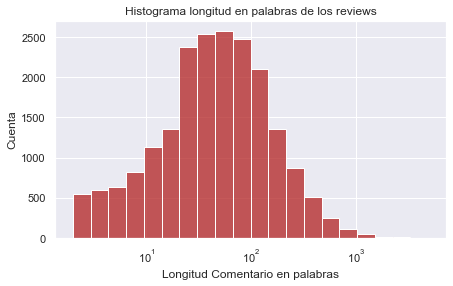

In [162]:
fig = plt.figure(figsize = (7,4))
ax = sns.histplot(data = base, x= 'LongitudComentario',log_scale=True,bins =20,color='firebrick')
ax.set( xlabel = "Longitud Comentario en palabras", ylabel = "Cuenta",title='Histograma longitud en palabras de los reviews')
print(base.LongitudComentario.mean())

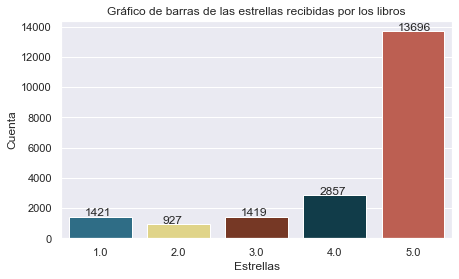

In [163]:
order_list = ['1.0', '2.0', '3.0', '4.0', '5.0']
fig = plt.figure(figsize = (7,4))
ax = sns.countplot(data = base, x = 'stars', order=order_list,palette=['#207394','#eede7b', '#833118','#084152','#cd5241'])
ax.set( xlabel = "Estrellas", ylabel = "Cuenta",title='Gráfico de barras de las estrellas recibidas por los libros')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))


In [164]:
estrellas = []
for r in base.stars:
    estrellas.append(float(r))
sum(estrellas)/len(estrellas)

4.303149606299213

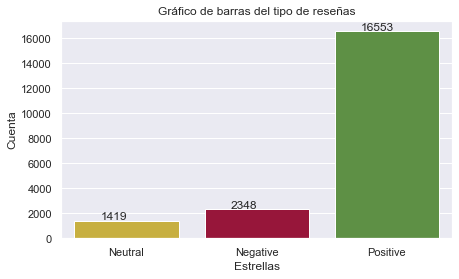

In [165]:

fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento1',order=order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])
ax.set( xlabel = "Estrellas", ylabel = "Cuenta",title='Gráfico de barras del tipo de reseñas')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

In [175]:
stop_words2 = stop_words.copy()
stop_words2.append('book')

In [123]:
def preprocesamiento(comentario):
    comentario =  re.sub('[^a-zA-Z]',' ',comentario)
    palabras = word_tokenize(comentario)
    palabras = [palabra.lower() for palabra in palabras ]
    #palabras = [palabra.translate(tabla) for palabra in palabras]
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    palabras = [palabra for palabra in palabras if not palabra in stop_words]
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    palabras = " ".join(palabras)
    return palabras

In [124]:
def preprocesamiento2(comentario):
    comentario =  re.sub('[^a-zA-Z]',' ',comentario)
    palabras = word_tokenize(comentario)
    palabras = [palabra.lower() for palabra in palabras ]
    #palabras = [palabra.translate(tabla) for palabra in palabras]
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    palabras = [palabra for palabra in palabras if not palabra in stop_words2]
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    palabras = " ".join(palabras)
    return palabras

In [179]:
base['comment_clean1']= base['comment'].apply(lambda x:preprocesamiento(x))
base['comment_clean2']=base['comment'].apply(lambda x:preprocesamiento2(x))

In [180]:
base.head()

,stars,comment,book_url,LongitudComentario,sentimiento1,comment_clean1,comment_clean2
0,5.0,Let me say at the outset of this review that I...,https://www.amazon.com/dp/1492041130,257,Positive,let say outset review respect author sheer gui...,let say outset review respect author sheer gui...
1,1.0,Its Capitalism at its best I read the book fro...,https://www.amazon.com/dp/1492041130,194,Negative,capitalism best read book nearby bookstore lik...,capitalism best read nearby bookstore like rev...
2,5.0,If youre looking to get started with data scie...,https://www.amazon.com/dp/1492041130,61,Positive,youre looking get started data science youre c...,youre looking get started data science youre c...
3,4.0,In general this is a good book It covers a wid...,https://www.amazon.com/dp/1492041130,106,Positive,general good book cover wide variety topic go ...,general good cover wide variety topic go enoug...
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,149,Positive,academic data scientist decade term coined lov...,academic data scientist decade term coined lov...


In [181]:
texto_total1 = " ".join(base['comment_clean1'])
texto_total2 =" ".join(base['comment_clean2'])

In [187]:
lista_palabras_total1 = word_tokenize(texto_total1)
fd1 = nltk.FreqDist(lista_palabras_total1)
frecuencia1 = pd.DataFrame(fd1.items(), columns=['word', 'frequency'])
frecuencia1 = frecuencia1.sort_values('frequency',ascending=False)
frecuencia1 = frecuencia1.head(15)


lista_palabras_total2 = word_tokenize(texto_total2)
fd2 = nltk.FreqDist(lista_palabras_total2)
frecuencia2 = pd.DataFrame(fd2.items(), columns=['word', 'frequency'])
frecuencia2 = frecuencia2.sort_values('frequency',ascending=False)
frecuencia2 = frecuencia2.head(15)

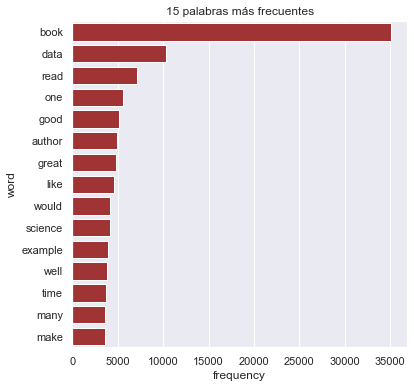

In [188]:
 fig = plt.figure(figsize = (6,6))
 ax = sns.barplot(y='word', x='frequency',data = frecuencia1,color="firebrick").set(title='15 palabras más frecuentes')

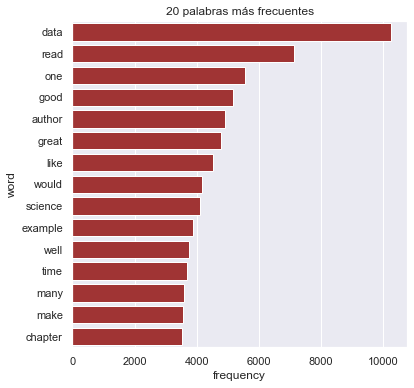

In [189]:
 fig = plt.figure(figsize = (6,6))
 ax = sns.barplot(y='word', x='frequency',data = frecuencia2,color="firebrick").set(title='20 palabras más frecuentes')

## textblob

In [190]:


# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [192]:
base['Polaridad_textBlob']  = base['comment_clean2'].apply(lambda x: getPolarity(x))
base['sentimiento_textBlob'] = base['Polaridad_textBlob'].apply(lambda x: analysis(x))

### Vader

In [193]:

analyzer = SentimentIntensityAnalyzer()
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    

base['Sentiment_Vader'] = base['comment_clean2'].apply(vadersentimentanalysis)
base['sentimiento_Vader'] = base['Sentiment_Vader'].apply(vader_analysis)

### Sentynet

In [194]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}


In [195]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [196]:

base['POS tagged'] = base['comment_clean2'].apply(token_stop_pos)

In [197]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return "Neutral"
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

In [198]:
base['sentimiento_sentinet'] = base['POS tagged'].apply(sentiwordnetanalysis)
#base.head(5)

In [199]:
base.dtypes

stars                    object
comment                  object
book_url                 object
LongitudComentario        int64
sentimiento1             object
comment_clean1           object
comment_clean2           object
Polaridad_textBlob      float64
sentimiento_textBlob     object
Sentiment_Vader         float64
sentimiento_Vader        object
POS tagged               object
sentimiento_sentinet     object
dtype: object

Gráficas

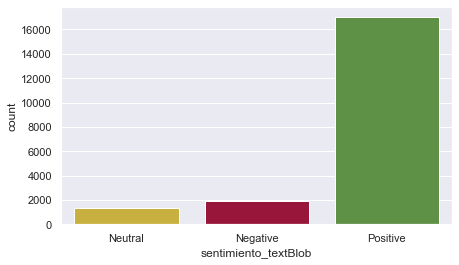

In [200]:

fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_textBlob',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

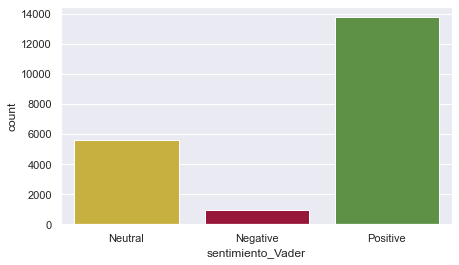

In [201]:
fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_Vader',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

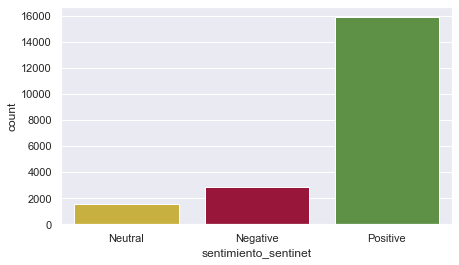

In [202]:
fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_sentinet',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

In [203]:
base_2 = base[['sentimiento1','sentimiento_textBlob', 'sentimiento_Vader','sentimiento_sentinet']].melt()
base_2

,variable,value
0,sentimiento1,Positive
1,sentimiento1,Negative
2,sentimiento1,Positive
3,sentimiento1,Positive
4,sentimiento1,Positive
...,...,...
81275,sentimiento_sentinet,Positive
81276,sentimiento_sentinet,Neutral
81277,sentimiento_sentinet,Negative
81278,sentimiento_sentinet,Positive


Text(0.5, 1.0, 'Sentimiento Sentinet')

<Figure size 720x504 with 0 Axes>

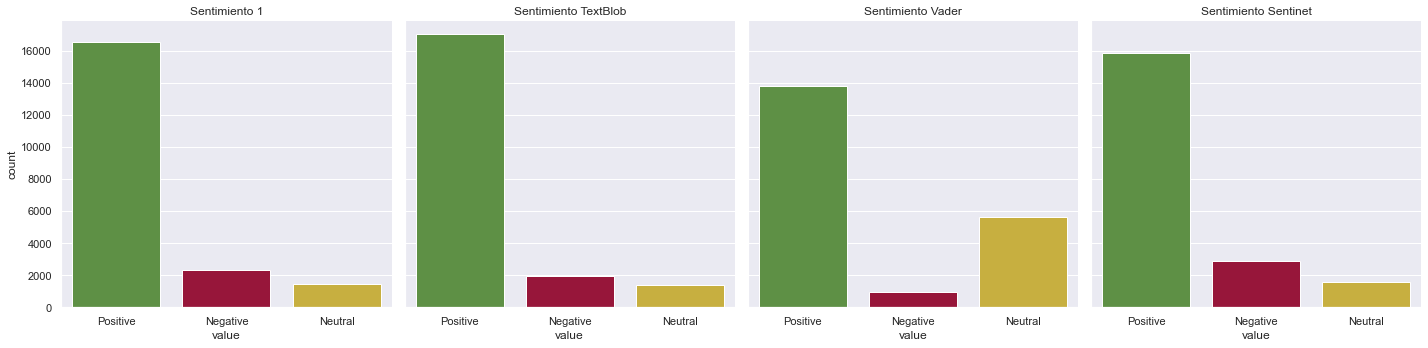

In [204]:

fig = plt.figure(figsize = (10,7))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.catplot(x= 'value', col="variable",kind='count', data=base_2, palette=[ '#5a9c39', '#ac0031','#debd29'])

axes = ax.axes.flatten()
axes[0].set_title("Sentimiento 1")
axes[1].set_title("Sentimiento TextBlob")
axes[2].set_title("Sentimiento Vader")
axes[3].set_title("Sentimiento Sentinet")

In [205]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
c= confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Matriz de Confución- Random Forest')

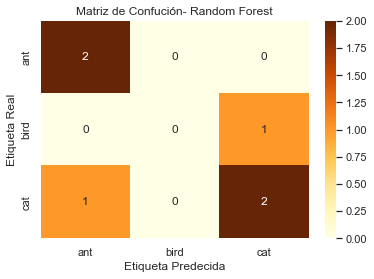

In [207]:
sns.heatmap(c,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["ant", "bird", "cat"], 
            yticklabels = ["ant", "bird", "cat"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confución- Random Forest")

In [220]:
y_real = base['sentimiento1']
y_pred_text_blob =base['sentimiento_textBlob']
y_pred_vader = base['sentimiento_Vader']
y_pred_sentinet = base['sentimiento_sentinet']

In [223]:
y_pred_vader.value_counts()

Positive    13774
Neutral      5618
Negative      928
Name: sentimiento_Vader, dtype: int64

In [224]:
y_pred_sentinet.value_counts()

Positive    15879
Negative     2860
Neutral      1581
Name: sentimiento_sentinet, dtype: int64

              precision    recall  f1-score   support

    Negative       0.44      0.37      0.40      2348
     Neutral       0.07      0.06      0.06      1419
    Positive       0.86      0.88      0.87     16553

    accuracy                           0.77     20320
   macro avg       0.46      0.44      0.45     20320
weighted avg       0.76      0.77      0.76     20320



Text(0.5, 1.0, 'Matriz de Confución TextBlob')

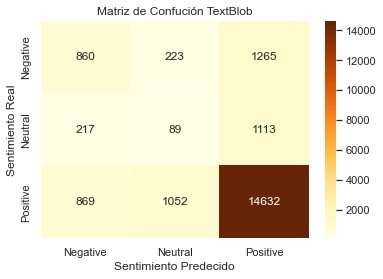

In [217]:
m1 = confusion_matrix(y_real, y_pred_text_blob)
print(classification_report(y_real, y_pred_text_blob))

sns.heatmap(m1,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Sentimiento Real')
plt.xlabel('Sentimiento Predecido')
plt.title("Matriz de Confución TextBlob")

              precision    recall  f1-score   support

    Negative       0.47      0.19      0.27      2348
     Neutral       0.10      0.39      0.16      1419
    Positive       0.89      0.74      0.81     16553

    accuracy                           0.65     20320
   macro avg       0.49      0.44      0.41     20320
weighted avg       0.79      0.65      0.70     20320



Text(0.5, 1.0, 'Matriz de Confución Vader')

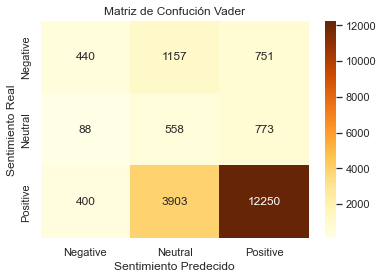

In [218]:
m2 = confusion_matrix(y_real, y_pred_vader)
print(classification_report(y_real, y_pred_vader))

sns.heatmap(m2,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Sentimiento Real')
plt.xlabel('Sentimiento Predecido')
plt.title("Matriz de Confución Vader")

              precision    recall  f1-score   support

    Negative       0.30      0.37      0.33      2348
     Neutral       0.07      0.07      0.07      1419
    Positive       0.86      0.82      0.84     16553

    accuracy                           0.72     20320
   macro avg       0.41      0.42      0.41     20320
weighted avg       0.74      0.72      0.73     20320



Text(0.5, 1.0, 'Matriz de Confución Sentinet')

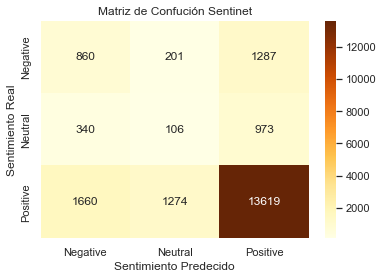

In [225]:
m3 = confusion_matrix(y_real, y_pred_sentinet)
print(classification_report(y_real, y_pred_sentinet))

sns.heatmap(m3,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Sentimiento Real')
plt.xlabel('Sentimiento Predecido')
plt.title("Matriz de Confución Sentinet")

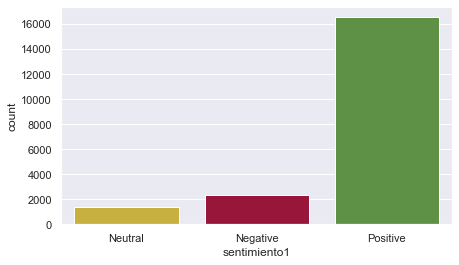

In [ ]:

fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento1',order=order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

In [112]:
base.sentimiento1.value_counts()

Positive    16553
Negative     2348
Neutral      1419
Name: sentimiento1, dtype: int64

In [113]:
y_real

0        Positive
1        Negative
2        Positive
3        Positive
4        Positive
           ...   
20641    Positive
20642     Neutral
20643    Positive
20644     Neutral
20645    Positive
Name: sentimiento1, Length: 20320, dtype: object

In [234]:
base_prueba = base[(base.sentimiento1 =='Positive')  & (base.sentimiento_textBlob=='Negative') ]

In [260]:
b = base_prueba['comment'].to_list()

In [263]:
b[1]

'After letting this book sit on my shelf for more than  years I finally cracked it open expecting to struggle through it To my surprise everything in here just clicked  as much as Id like to think its because I have a natural affinity for this topic Im pretty sure its due to the authors doing a fantastic job breaking down the concepts into really clear easy to understand language Seriously to all the other businesstechdata science writers out there you have no excuse now for writing unintelligible confusing jargony books Data science really doesnt have to be this mysterious dark art that some others try to present it asthank you Foster Provost and Tom Fawcett for cutting through the crap and  dispelling that myth with this book'